## 📊 Walmart Sales Project

## 1  🧭 Project Overview & Objective

<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

## 2  📥 Data Loading & Initial Inspection

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import plotly_express as px
import plotly.io as pio 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [137]:
df = pd.read_csv('/Users/wafazeghouane/Desktop/Data_science_Full stack/Final projects/Walmart /Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [138]:
df.describe(include='all')
#CPI – Prevailing consumer price index

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [139]:
df.isna().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [140]:
df.isna().sum().sum() #the sum of all the missing value

103

In [141]:
#type of the variables 
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [142]:
df.shape

(150, 8)

## 3️ 🧹 Data Cleaning

In [143]:
# drop the missing value from the target "weekly-sales"
Weekly_sales1 = (df['Weekly_Sales'].notnull()) 
df = df.loc[Weekly_sales1, :]
print(df)

     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      6.0  18-02-2011    1572117.54           NaN        59.61       3.045   
1     13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
3     11.0         NaN    1244390.03           0.0        84.57         NaN   
4      6.0  28-05-2010    1644470.66           0.0        78.89       2.759   
5      4.0  28-05-2010    1857533.70           0.0          NaN       2.756   
..     ...         ...           ...           ...          ...         ...   
145   14.0  18-06-2010    2248645.59           0.0        72.62       2.780   
146    7.0         NaN     716388.81           NaN        20.74       2.778   
147   17.0  11-06-2010     845252.21           0.0        57.14       2.841   
148    8.0  12-08-2011     856796.10           0.0        86.05       3.638   
149   19.0  20-04-2012    1255087.26           0.0        55.20       4.170   

            CPI  Unemployment  
0    214.777523    

In [144]:
#Outliers are values in a dataset that are significantly different from the majority of the data. They are unusually high or low compared to other observations and can result from variability in the data, measurement errors, or other anomalies.

# mean - 3* standard deviation, mean+3* standard deviation
# the 1st purpose is to know how many outliers we have in our dataset for temperature, Fuel_price, Umployment..

print('Dropping outliers in Temperature ...')
low =  df['Temperature'].mean() - 3 *  df['Temperature'].std()
high =  df['Temperature'].mean() + 3 *  df['Temperature'].std()
print('The number of outliers in {} is {}'.format('Temperature', df.loc[(df['Temperature'] <= low) | (df['Temperature'] >= high)].shape[0]))


print('Dropping outliers in Fuel_price ...')
low =  df['Fuel_Price'].mean() - 3 *  df['Fuel_Price'].std()
high =  df['Fuel_Price'].mean() + 3 *  df['Fuel_Price'].std()
print('The number of outliers in {} is {}'.format('Fuel_Price', df.loc[(df['Fuel_Price'] <= low) | (df['Fuel_Price'] >= high)].shape[0]))


print('Dropping outliers in CPI ...')
low =  df['CPI'].mean() - 3 *  df['CPI'].std()
high =  df['CPI'].mean() + 3 *  df['CPI'].std()
print('The number of outliers in {} is {}'.format('CPI', df.loc[(df['CPI'] <= low) | (df['CPI'] >= high)].shape[0]))



print('Dropping outliers in Unemployment ...')
low =  df['Unemployment'].mean() - 3 *  df['Unemployment'].std()
high =  df['Unemployment'].mean() + 3 *  df['Unemployment'].std()
print('The number of outliers in {} is {}'.format('Unemployment', df.loc[(df['Unemployment'] <= low) | (df['Unemployment'] >= high)].shape[0]))

Dropping outliers in Temperature ...
The number of outliers in Temperature is 0
Dropping outliers in Fuel_price ...
The number of outliers in Fuel_Price is 0
Dropping outliers in CPI ...
The number of outliers in CPI is 0
Dropping outliers in Unemployment ...
The number of outliers in Unemployment is 5


In [145]:
# we have to drop the outliers in Umeployment because we have 5 
low = df['Unemployment'].mean() - 3 * df['Unemployment'].std()
high = df['Unemployment'].mean() + 3 * df['Unemployment'].std()
df = df.drop(df.loc[(df['Unemployment'] <= low) | (df['Unemployment'] >= high)].index)
df.shape

(131, 8)

In [146]:
df.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,131.000000,113,1.310000e+02,120.000000,117.000000,119.000000,120.000000,117.000000
unique,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,16-03-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.938931,NaN,1.257990e+06,0.066667,60.405897,3.302908,180.175755,7.399427
std,6.228663,NaN,6.577463e+05,0.250490,18.466740,0.475435,39.723167,0.994117
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,5.842439e+05,0.000000,44.820000,2.824000,132.579257,6.664000
50%,9.000000,NaN,1.366396e+06,0.000000,61.790000,3.435000,197.655672,7.368000
75%,16.000000,NaN,1.809576e+06,0.000000,75.540000,3.708500,214.904838,8.099000


In [147]:
# Now we have to replace the missing values by the mean 
# replace missing values with valid information

# List of columns to replace missing values
columns_to_fill = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Replace missing values with the mean for each specified column
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [148]:
# Impute missing values with the mode (most frequent value)/ holiday_Flag is categorical variable so we replace the missing values by mode 
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(df['Holiday_Flag'].mode()[0])
df['Store'] = df['Store'].fillna(df['Store'].mode()[0])

# If you want to check the result
print(df.isnull().sum())  # Check for any remaining missing values

Store            0
Date            18
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
dtype: int64


In [149]:
print("Dropping outliers in Date...")
to_keep = (df['Date'].notnull())  # We want keeping values not null
df = df.loc[to_keep, :]
print("Done. Number of lines remaining : ", df.shape[0])

Dropping outliers in Date...
Done. Number of lines remaining :  113


In [150]:
df['Date'] = pd.to_datetime(df["Date"])

/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_2542/2639060560.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df["Date"])


In [151]:
# date column we have to transform it into year, month, day and day of the week 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.date
df['Day_of_Week'] = df['Date'].dt.day_name()

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_Week
0,6.0,2011-02-18,1572117.54,0.0,59.610000,3.045,214.777523,6.858000,2011,February,2011-02-18,Friday
1,13.0,2011-03-25,1807545.43,0.0,42.380000,3.435,128.616064,7.470000,2011,March,2011-03-25,Friday
4,6.0,2010-05-28,1644470.66,0.0,78.890000,2.759,212.412888,7.092000,2010,May,2010-05-28,Friday
5,4.0,2010-05-28,1857533.70,0.0,60.405897,2.756,126.160226,7.896000,2010,May,2010-05-28,Friday
6,15.0,2011-06-03,695396.19,0.0,69.800000,4.069,134.855161,7.658000,2011,June,2011-06-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.440000,3.594,226.968844,6.034000,2012,October,2012-10-19,Friday
145,14.0,2010-06-18,2248645.59,0.0,72.620000,2.780,182.442420,8.899000,2010,June,2010-06-18,Friday
147,17.0,2010-06-11,845252.21,0.0,57.140000,2.841,126.111903,7.399427,2010,June,2010-06-11,Friday
148,8.0,2011-08-12,856796.10,0.0,86.050000,3.638,219.007525,7.399427,2011,August,2011-08-12,Friday


In [152]:
df.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_Week
count,113.000000,113,1.130000e+02,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113,113,113
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,78,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,2012-03-16,Friday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,3,113
mean,9.858407,2011-04-24 21:52:33.982300928,1.267415e+06,0.061947,60.215566,3.276690,180.110994,7.378980,2010.831858,NaN,NaN,NaN
min,1.000000,2010-02-05 00:00:00,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,NaN,NaN,NaN
25%,4.000000,2010-07-30 00:00:00,5.634608e+05,0.000000,46.750000,2.841000,132.763355,6.768000,2010.000000,NaN,NaN,NaN
50%,9.000000,2011-04-22 00:00:00,1.420405e+06,0.000000,60.405897,3.302908,192.826069,7.399427,2011.000000,NaN,NaN,NaN
75%,15.000000,2012-01-13 00:00:00,1.847431e+06,0.000000,74.920000,3.659000,214.749245,8.028000,2012.000000,NaN,NaN,NaN
max,20.000000,2012-10-19 00:00:00,2.771397e+06,1.000000,91.650000,4.170000,226.968844,9.524000,2012.000000,NaN,NaN,NaN


## 4 📈 Exploratory Data Analysis (EDA)

In [153]:

# target = weekly-sales 
# we can study weekly-sales per store 
# correlation between features 
# weekly_sales over the years to see if there is an evolution
#weekely sales over Day_of_week
#sales over month? 


#.reset_index(name="Total_Sales")
#If we want to sort keys in descending order, use the below.
sales_by_store =df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sales").sort_values(by="Total_Sales",ascending=False)
sales_by_store

,Store,Total_Sales
12,14.0,18835905.73
11,13.0,17975118.68
3,4.0,13042553.90
0,1.0,12400807.53
1,2.0,11893374.43
17,19.0,11204921.72
5,6.0,9306741.48
16,18.0,8063872.40
18,20.0,7766084.51
9,10.0,5564543.12


/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_2542/115749188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_store['Store'],y=sales_by_store['Total_Sales'],order=sales_by_store['Store'], palette='tab10')


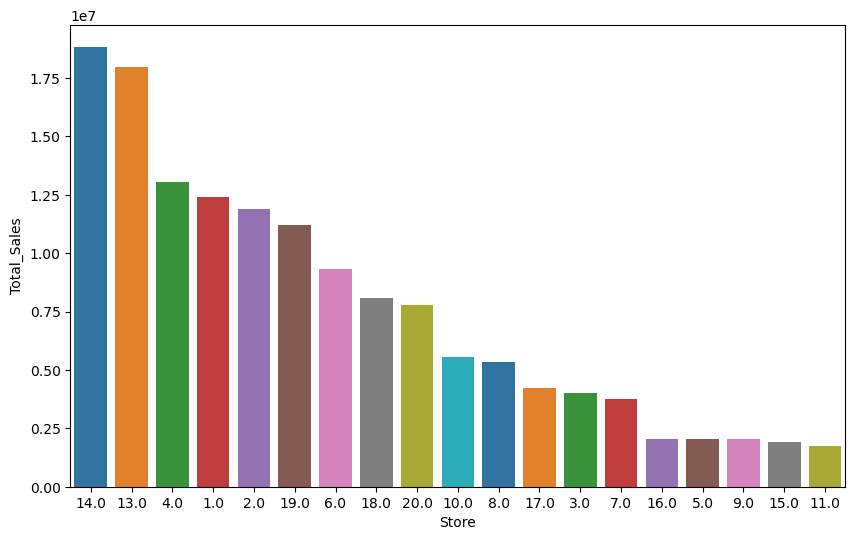

In [154]:
# Which store generates the most revenue?
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_store['Store'],y=sales_by_store['Total_Sales'],order=sales_by_store['Store'], palette='tab10')
plt.show()


# 📈 Interpretation – Total Sales Trends by Store
From the chart, we observe a declining trend in total weekly sales over the years:

2010 recorded the highest total sales, approximately 62 million, indicating strong performance during that year.

2011 saw a moderate decline, with total sales dropping to around 46 million.

2012 had the lowest total sales, about 35 million, which may suggest a continued decline in performance or possibly incomplete data for that year.

/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_2542/363800415.py:7: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


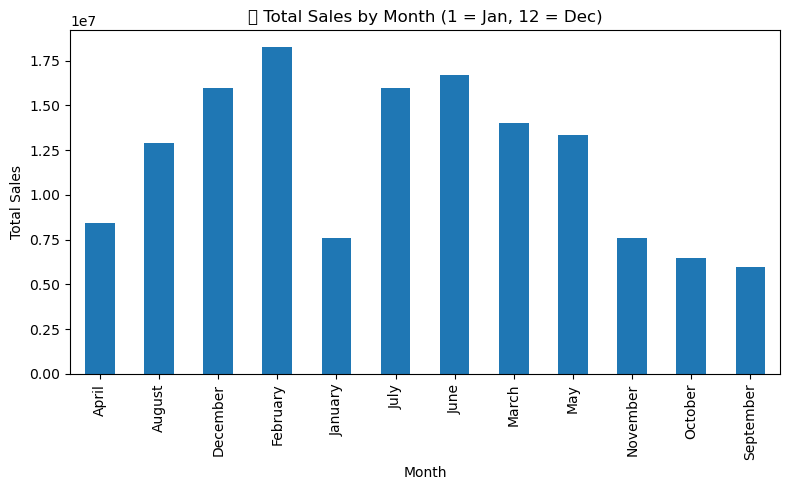

In [155]:
#Total Sales by Month: 

df.groupby("Month")["Weekly_Sales"].sum().plot(kind="bar", figsize=(8, 5))
plt.title("📆 Total Sales by Month (1 = Jan, 12 = Dec)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


# 📈 Interpretation – Monthly Sales Trends by Year 
 Sales peak in February, followed by June, July, and December, suggesting strong performance around winter and summer periods.
The lowest sales are seen in September, October, and November, indicating a potential seasonal slowdown before the holiday spike.

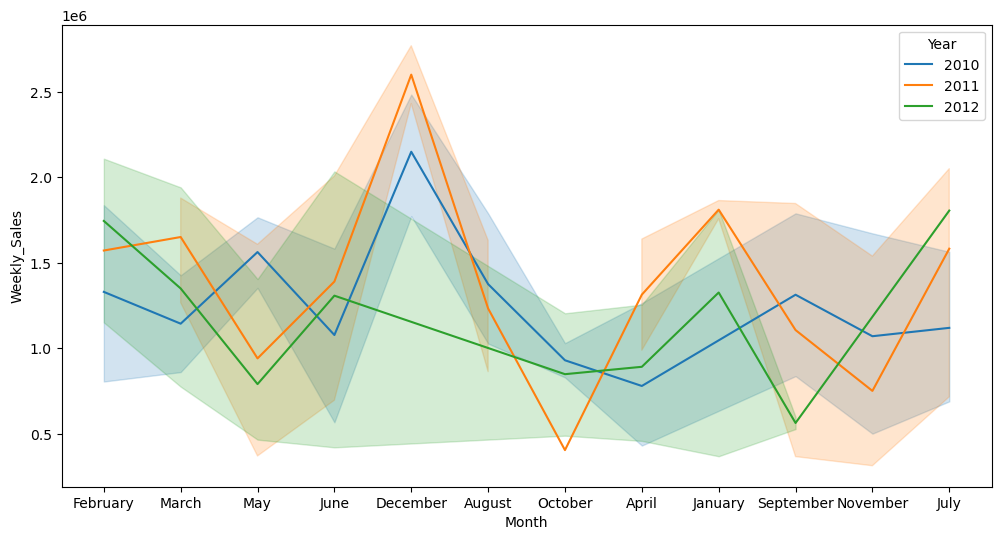

In [156]:
# total sales per year

plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x='Month',y='Weekly_Sales',hue='Year',palette='tab10')
plt.show()

## 📈 Interpretation – Monthly Sales Trends by Year
Sales peak in December across all years, confirming strong holiday season performance.
2011 shows the highest spike, while 2012 is more stable with lower peaks.
Notable dips occur around May and September, suggesting seasonal slowdowns.

/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_2542/1127803626.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


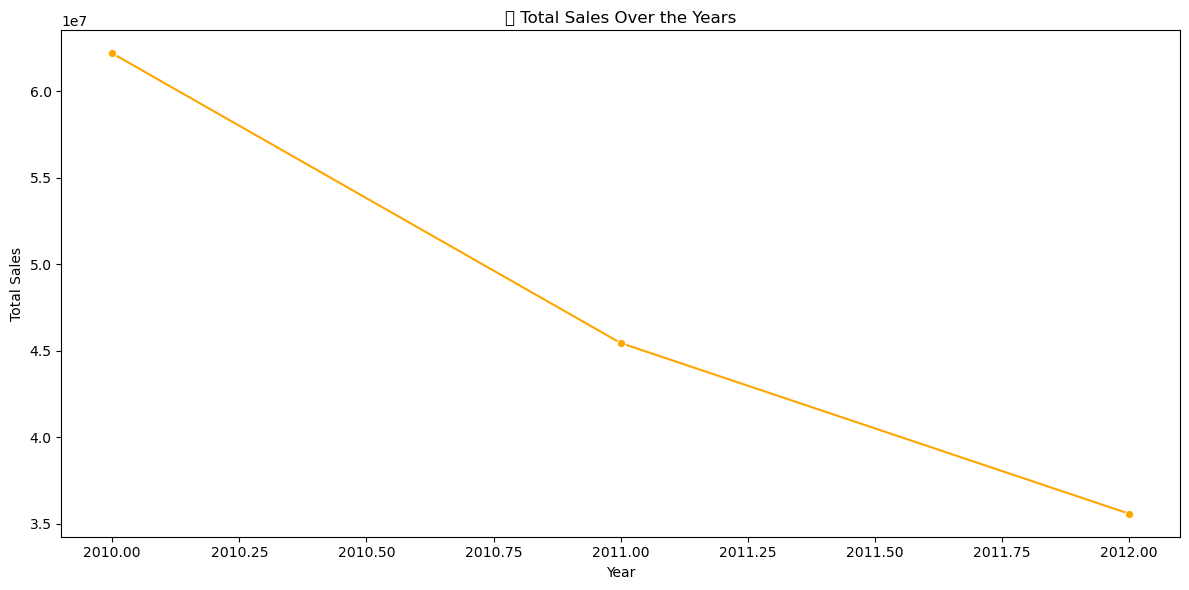

In [157]:
# Grouping by Year and summing weekly sales
sales_by_year = df.groupby("Year")["Weekly_Sales"].sum().reset_index()
sales_by_year = sales_by_year.rename(columns={"Weekly_Sales": "Total_Sales"})

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x="Year", y="Total_Sales", marker="o", color="orange")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("📈 Total Sales Over the Years")
plt.tight_layout()
plt.show()


# 📉 Interpretation – Total Sales Over the Years
The plot shows a steady decline in total sales from 2010 to 2012.

2010 had the highest sales, while 2012 had the lowest.

This downward trend may be linked to reduced data coverage (fewer weeks recorded per year), as previously observed.

In [ ]:
df["Year"].value_counts().sort_index()

Year
2010    49
2011    34
2012    30
Name: count, dtype: int64

The drop in total sales over the years is partially explained by the decreasing number of weeks recorded.
📉 Fewer weeks = fewer opportunities to log sales

Holiday_Flag values: [0. 1.]
Holiday_Flag
0.0    1.262128e+06
1.0    1.347476e+06
Name: Weekly_Sales, dtype: float64


/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_2542/1412939282.py:20: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


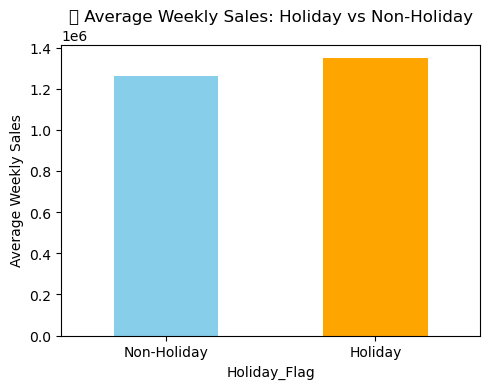

In [194]:
#Holiday vs Non-Holiday Sales

# 1. Check unique values 
print("Holiday_Flag values:", df["Holiday_Flag"].unique())

# 2. Compute average weekly sales for holiday and non-holiday weeks
avg_sales_holiday = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()
print(avg_sales_holiday)

# 3. Plot comparison
avg_sales_holiday.plot(
    kind="bar",
    figsize=(5, 4),
    color=["skyblue", "orange"]
)

plt.xticks(ticks=[0, 1], labels=["Non-Holiday", "Holiday"], rotation=0)
plt.title("🎉 Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


Weekly sales are slightly higher during holiday weeks compared to non-holiday weeks.

                 Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store         1.000000      0.130611     -0.006015    -0.267682    0.150044   
Weekly_Sales  0.130611      1.000000      0.030630    -0.188228   -0.018298   
Holiday_Flag -0.006015      0.030630      1.000000    -0.296693   -0.155234   
Temperature  -0.267682     -0.188228     -0.296693     1.000000   -0.054216   
Fuel_Price    0.150044     -0.018298     -0.155234    -0.054216    1.000000   
CPI          -0.582306     -0.334454      0.156921     0.148861   -0.154162   
Unemployment  0.275999      0.165851      0.093860    -0.186625   -0.007283   
Year         -0.034553     -0.040318      0.007933    -0.149942    0.786013   
Week         -0.029824     -0.016355     -0.045673     0.256556   -0.104816   

                   CPI  Unemployment      Year      Week  
Store        -0.582306      0.275999 -0.034553 -0.029824  
Weekly_Sales -0.334454      0.165851 -0.040318 -0.016355  
Holiday_Flag  0.156921      0.09

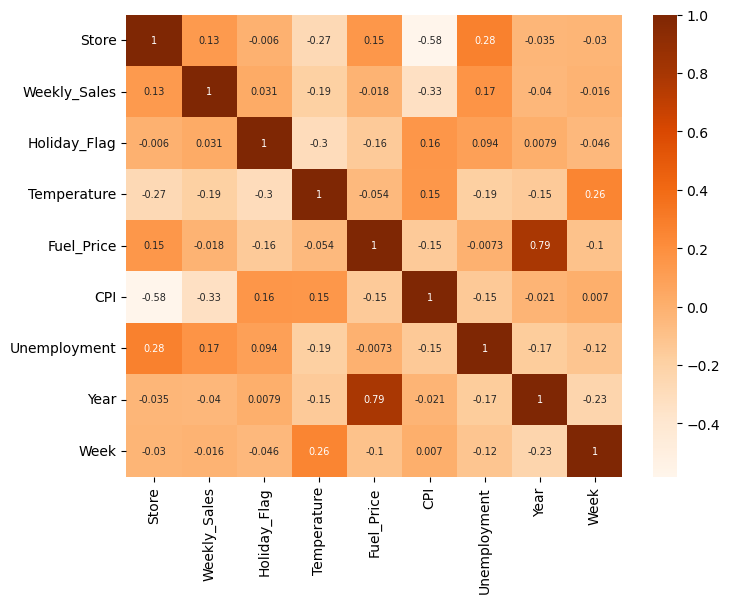

In [195]:
#correlation between features :

print(df.corr(numeric_only=True))
plt.figure(figsize=(8, 6))  
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="Oranges", annot=True,annot_kws={"size": 7})
plt.show()

In [197]:
print("I found that the highest correlation is between Year and Fuel Price")
print("the correlation is positive, it suggests that as the year progresses, fuel prices may have increased over time.")

# 0.0 - 0.3 -> No correlation
# 0.3 - 0.5 -> Weak correlation
# 0.5 - 0.7 -> Moderate correlation
# 0.7 - 1.0 -> Strong correlation

I found that the highest correlation is between Year and Fuel Price
the correlation is positive, it suggests that as the year progresses, fuel prices may have increased over time.


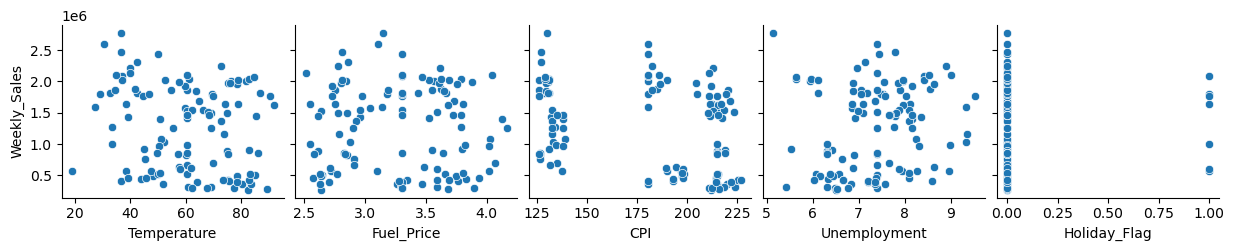

In [198]:
sns.pairplot(
    df,
    x_vars=["Temperature", "Fuel_Price", "CPI", "Unemployment", "Holiday_Flag"],
    y_vars=["Weekly_Sales"],

)

# 🔍 Interpretation – Weekly Sales vs. External Factors
The scatter plots show no strong linear relationships between Weekly_Sales and the external features:

Temperature, Fuel Price, CPI, Unemployment → all show scattered distributions with no clear trend.

Holiday_Flag shows two clusters (0 and 1), but the difference in sales is minor — consistent with the earlier holiday bar chart.

📝 Conclusion: These external features likely have limited direct influence on weekly sales

In [165]:
df2 = df.drop(['Date', 'Day','Day_of_Week'], axis=1)
df2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,6.0,1572117.54,0.0,59.610000,3.045,214.777523,6.858000,2011,February
1,13.0,1807545.43,0.0,42.380000,3.435,128.616064,7.470000,2011,March
4,6.0,1644470.66,0.0,78.890000,2.759,212.412888,7.092000,2010,May
5,4.0,1857533.70,0.0,60.405897,2.756,126.160226,7.896000,2010,May
6,15.0,695396.19,0.0,69.800000,4.069,134.855161,7.658000,2011,June
...,...,...,...,...,...,...,...,...,...
144,3.0,424513.08,0.0,73.440000,3.594,226.968844,6.034000,2012,October
145,14.0,2248645.59,0.0,72.620000,2.780,182.442420,8.899000,2010,June
147,17.0,845252.21,0.0,57.140000,2.841,126.111903,7.399427,2010,June
148,8.0,856796.10,0.0,86.050000,3.638,219.007525,7.399427,2011,August


# 5 🤖 Preprocessing & Predictive Modeling

In [199]:
# PREPROCESSING 


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
#Drop rows and columns. Cleaning the database from the useless columns #unique identifiers
df2['Month'] = df['Month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})

df2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,6.0,1572117.54,0.0,59.610000,3.045,214.777523,6.858000,2011,2
1,13.0,1807545.43,0.0,42.380000,3.435,128.616064,7.470000,2011,3
4,6.0,1644470.66,0.0,78.890000,2.759,212.412888,7.092000,2010,5
5,4.0,1857533.70,0.0,60.405897,2.756,126.160226,7.896000,2010,5
6,15.0,695396.19,0.0,69.800000,4.069,134.855161,7.658000,2011,6
...,...,...,...,...,...,...,...,...,...
144,3.0,424513.08,0.0,73.440000,3.594,226.968844,6.034000,2012,10
145,14.0,2248645.59,0.0,72.620000,2.780,182.442420,8.899000,2010,6
147,17.0,845252.21,0.0,57.140000,2.841,126.111903,7.399427,2010,6
148,8.0,856796.10,0.0,86.050000,3.638,219.007525,7.399427,2011,8


In [214]:
# Separate target variable Y from features X

# Split X and y

print("Separating labels from features...")

features_list = ['Store','Holiday_Flag', 'Temperature', 'Fuel_Price',
                'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_week']
target= "Weekly_Sales"


target = 'Weekly_Sales'

X = df2.drop(target, axis=1)
Y= df2[target]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
5    1857533.70
6     695396.19
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           0.0    59.610000       3.045  214.777523         6.858   
1   13.0           0.0    42.380000       3.435  128.616064         7.470   
4    6.0           0.0    78.890000       2.759  212.412888         7.092   
5    4.0           0.0    60.405897       2.756  126.160226         7.896   
6   15.0           0.0    69.800000       4.069  134.855161         7.658   

   Year  Month  
0  2011      2  
1  2011      3  
4  2010      5  
5  2010      5  
6  2011      6  


In [215]:
#Split the data into a train set and a test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Setting random_state=42 ensures the same random values are generated every time, making results consistent.



In [205]:
#Encoding (categorical variables only) 💻
#all categorical variables must be encoded, that is turned into numbers.

#Les pipelines Scikit permettent d'intégrer de manière très flexible un ensemble d'opérations de pre-processing 

numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment","Year","Month"]  # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
     steps=[
        (
            "imputer",
            SimpleImputer(strategy="mean"),
        ),   #missing values will be replaced by columns'mean'
        ("scaler", StandardScaler()),
  ]
)

#it is better to remove year and moth from the model. try another model without these features 

In [206]:
# Create pipeline for categorical features
categorical_features = ["Store","Holiday_Flag"]  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
     steps= [
        (
          "imputer",
        SimpleImputer(strategy="most_frequent"),
        ),  # missing values will be replaced by most frequent value
        (
            "encoder",
            OneHotEncoder(drop="first"),
        ),  # first column will be dropped to avoid creating correlations between features
  ]
)

In [208]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment', 'Year', 'Month']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Store', 'Holiday_Flag'])])

In [209]:
#Modeling
#With linear regression

X_train = preprocessor.fit_transform(x_train)
X_test = preprocessor.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
Y_test_pred = lin_reg.predict(X_test)

print("r2-score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='r2').std())
print("r2-score on test set : ", r2_score(y_test, Y_test_pred))

r2-score on train set :  0.9645223955660939
Standard deviation on train set : 0.09061942172300022
r2-score on test set :  0.9211682199033698


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# ✅ Linear Regression Results – Interpretation
R² on training set: 0.96
➤ The model explains 96% of the variance in the training data 

R² on test set: 0.92
➤ Performance remains strong on unseen data, indicating the model generalizes well and is not overfitting.

Standard deviation on train residuals: 0.09
➤ This means predictions on the training set typically deviate from the actual values by a small margin

In [220]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression

In [176]:
# Fight overfitting by using regularization, cross-validation

#A Ridge linear regression model

# Train Ridge Regression model

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model

ridge1 = Ridge(alpha=1)
ridge1.fit(X_train, y_train)

train_score_ridge = ridge1.score(X_train, y_train)
test_score_ridge = ridge1.score(X_train, y_train)



print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))





The train score for ridge model is 0.9347284622705673
The test score for ridge model is 0.9347284622705673


In [177]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.6078780587331558
The test score for ridge model is 0.4910314111343672


In [178]:
ridgeReg2 = Ridge(alpha=100)

ridgeReg2.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge1 = ridgeReg2.score(X_train, y_train)
test_score_ridge1 = ridgeReg2.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge1))
print("The test score for ridge model is {}".format(test_score_ridge1))


Ridge Model............................................

The train score for ridge model is 0.2046365114464168
The test score for ridge model is 0.15854423676309282


In [179]:
print("In Ridge regression, as the value of alpha increases, the R2 score decreases. This happens because a higher alpha imposes stronger regularization, which reduces model complexity and prevents overfitting. However, if alpha is too large, the model may underfit, leading to a significant drop in performance")

In Ridge regression, as the value of alpha increases, the R2 score decreases. This happens because a higher alpha imposes stronger regularization, which reduces model complexity and prevents overfitting. However, if alpha is too large, the model may underfit, leading to a significant drop in performance


In [180]:
lasso1 = Lasso(alpha=1)
lasso1.fit(X_train, y_train)

train_score_lasso = lasso1.score(X_train, y_train)
test_score_lasso = lasso1.score(X_test, y_test)


print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.9714729992482496
The test score for lasso model is 0.9309298643540248


In [181]:
lasso1 = Lasso(alpha=10)
lasso1.fit(X_train, y_train)

train_score_lasso = lasso1.score(X_train, y_train)
test_score_lasso = lasso1.score(X_test, y_test)


print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.9714727537102436
The test score for lasso model is 0.9309100589559905


In [182]:
lasso1 = Lasso(alpha=100)
lasso1.fit(X_train, y_train)

train_score_lasso = lasso1.score(X_train, y_train)
test_score_lasso = lasso1.score(X_test, y_test)


print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.9714551199357582
The test score for lasso model is 0.9309042657073907


Train R² = 0.971 → The model still explains 97% of the variance in the training data.

Test R² = 0.931 → It explains 93% of the variance on new (unseen) data.

In [183]:
print ("In Lasso regression, as alpha increases, the R2 score does not always decrease")

In Lasso regression, as alpha increases, the R2 score does not always decrease


# Final Conclusion

In this project, we explored and modeled weekly sales data from Walmart stores with the goal of understanding key sales patterns and building a predictive model.

🔍 Key Insights from EDA:

2010 had the highest total sales, followed by a noticeable drop in 2011 and 2012 — partially explained by fewer recorded weeks.

Sales varied widely across stores

Monthly patterns showed expected peaks in November–December, possibly due to holiday shopping.

No strong correlation was observed between weekly sales and external factors like temperature, fuel price, CPI, or unemployment.

Holiday weeks did not significantly increase weekly sales on average.

🤖 Predictive Modeling:

A linear regression model was trained and achieved:

R² = 0.96 on the training set

R² = 0.92 on the test set

This indicates that the model generalizes well and is not overfitting.

We then applied Ridge and Lasso regularization:

Ridge improved generalization slightly by shrinking large coefficients.

Lasso also helped reduce overfitting and identified less useful features by setting some coefficients to zero.